<u> <h1 style="text-align:center;"> Car Price Prediction - Supervised ML</h1> <u> 

### Problem Statement:
**A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.**     <br>    
**You are required to model the price of cars with the available independent variables from given dataset. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.     
Further, the model will be a good way for the management to understand the pricing dynamics of a new market.**

**Essentially, the company wants to know:**
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car           

Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

<br>

# IMPORTING GENERAL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns',None)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(palette='flare')
import warnings
warnings.filterwarnings('ignore')

<br>

# IMPORTING DATASET

In [2]:
df=pd.read_csv('CarPrice.csv')

<br>

# INITIAL INFO ON DATASET

In [3]:
rows,cols=df.shape
print(f'Dataset has {rows} rows and {cols} columns')

Dataset has 205 rows and 26 columns


## Columns in Dataset

In [4]:
print(f'Columns in dataset are\n\n{df.columns}')

Columns in dataset are

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


<h2 style="color: #239b56 ">Each car (row or entry) has 26 columns associated with it including the target, 'price'.</h2>

## Displaying 5 Random Rows

In [5]:
df.sample(5)

car_ID  symboling            CarName fueltype aspiration doornumber  \
95       96          1        nissan juke      gas        std        two   
193     194          0  volkswagen dasher      gas        std       four   
75       76          1     mercury cougar      gas      turbo        two   
58       59          3        mazda glc 4      gas        std        two   
111     112          0        peugeot 504      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
95   hatchback        fwd          front       94.5      165.6      63.8   
193      wagon        fwd          front      100.4      183.1      66.9   
75   hatchback        rwd          front      102.7      178.4      68.0   
58   hatchback        rwd          front       95.3      169.0      65.7   
111      sedan        rwd          front      107.9      186.7      68.4   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
95        53.3        2028        ohc           four          97       2bbl   
193       55.1        2563        ohc           four         109       mpfi   
75        54.8        2910        ohc           four         140       mpfi   
58        49.6        2500      rotor            two          80       mpfi   
111       56.7        3075          l           four         120       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
95        3.15   3.290               9.4          69     5200       31   
193       3.19   3.400               9.0          88     5500       25   
75        3.78   3.120               8.0         175     5000       19   
58        3.33   3.255               9.4         135     6000       16   
111       3.46   2.190               8.4          95     5000       19   

     highwaympg    price  
95           37   7799.0  
193          31  12290.0  
75           24  16503.0  
58           23  15645.0  
111          24  15580.0

## Dataset Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

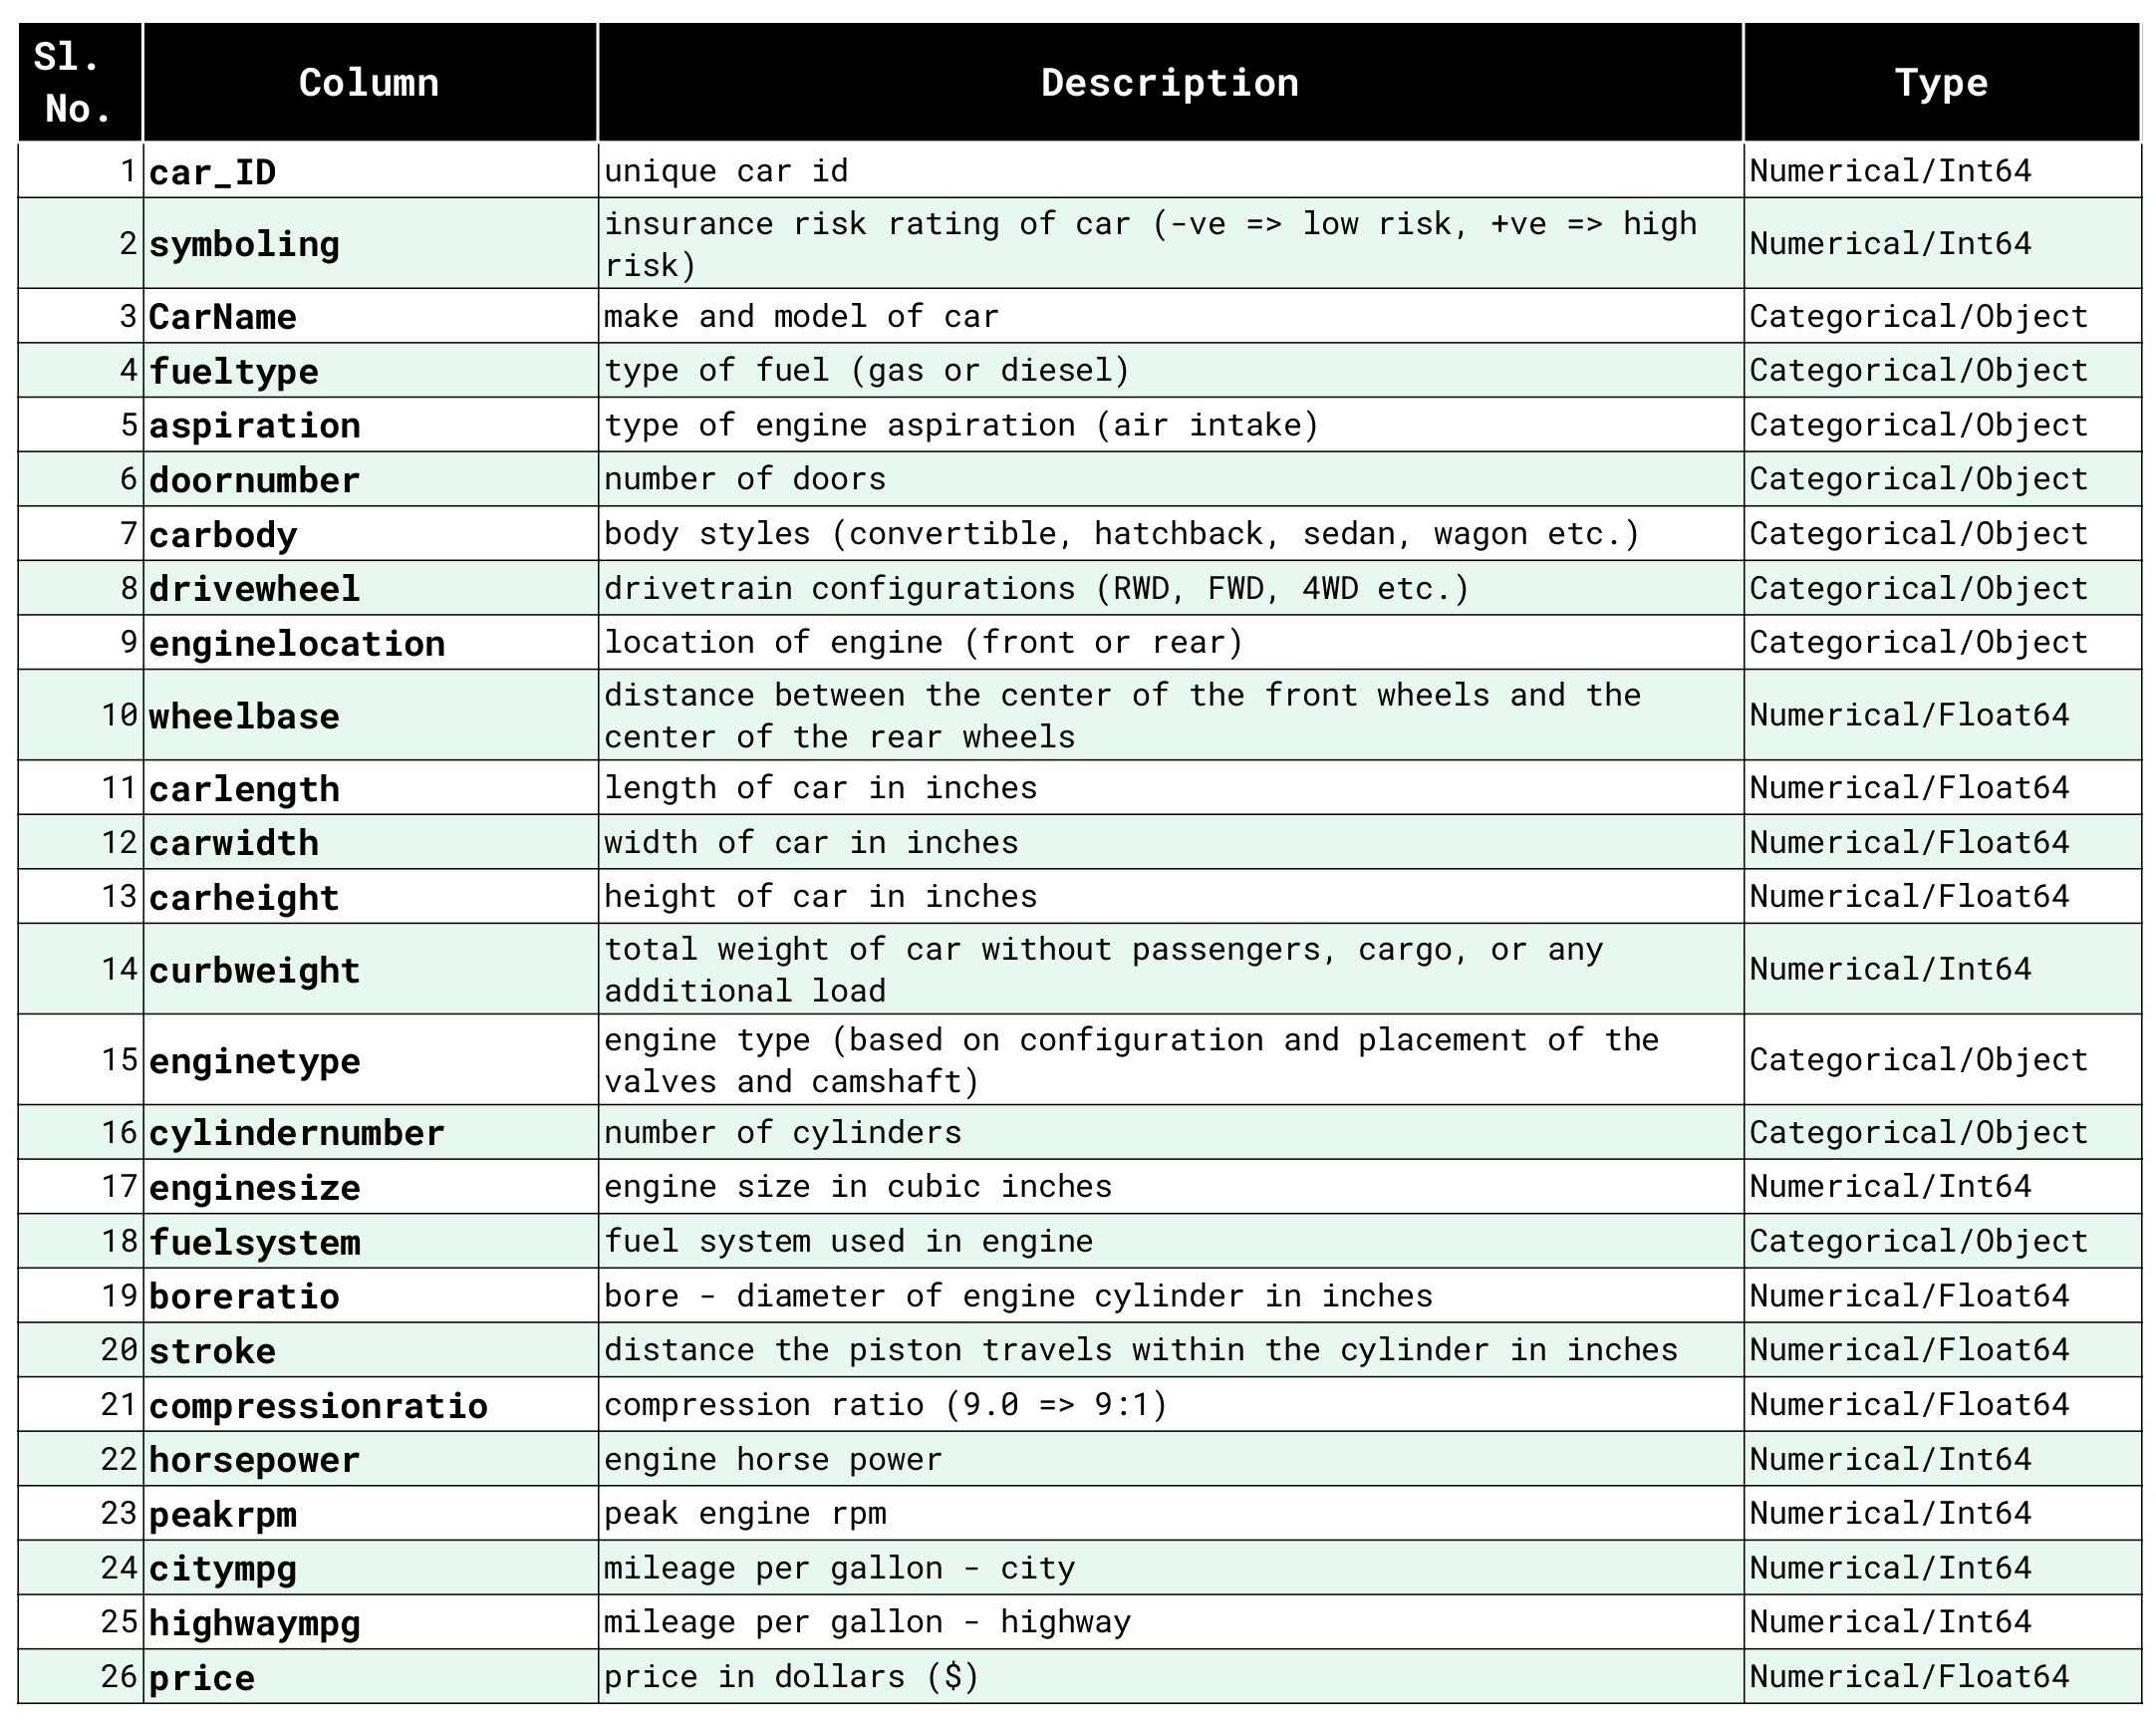

<br>

<hr>

# PREPARING DATASET

## Checking for Null Values

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<h2 style="color: #239b56 ">There are no entries with NaN or Null in any feature.</h2>

## Checking for Duplicate Entries

In [8]:
df.duplicated().sum()

0

<h2 style="color: #239b56 ">There are no duplicate entries.</h2>

## Seperating Numerical and Categorical Columns

In [9]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [10]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

> <h3 style="color: #424949 "> Note:<br><br> <i>it is better to convert column 'symboling'  to type 'object'</i> </h3>

In [11]:
df['symboling'] = df['symboling'].astype('object')

In [12]:
numerical_columns = list(df.select_dtypes(include=['float64', 'int64']).columns)
categorical_columns=list(df.select_dtypes(include=['object']).columns)

## Numerical Features

In [13]:
numerical_columns

['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

> <h3 style="color: #424949 ">Note:<br><br> <i>The column 'car_ID' seems irrelevant and might have no role in determining the target</i> </h3>

In [14]:
df=df.drop(columns=['car_ID'], axis=1)

In [15]:
#rcreating a list of numerical features
numerical_features = numerical_columns.copy()
for feature in ['car_ID', 'price']:
    numerical_features.remove(feature)

In [16]:
 numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [17]:
len(numerical_features)

13

## Categorical Features

In [18]:
categorical_columns

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [19]:
for col in categorical_columns:
    print(df[col].value_counts(),"\n")

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64 

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64 

fueltype
gas       185
diesel     20
Name: count, dtype: int64 

aspiration
std      168
turbo     37
Name: count, dtype: int64 

doornumber
four    115
two      90
Name: count, dtype: int64 

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64 

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64 

enginelocation
front    202
rear       3
Name: count, dtype: int64 

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count

> <h3 style="color: #424949 ">Insight:<br><br> <i>the column 'CarName' contains 147 unique values, which might increase the complexity of the project.<br> Entries in 'CarName' appears to be in the format make[space]model. Extracting 'make' from the data might reduce the complexity while retaining significant information. </i> </h3>

In [20]:
#Extracting Make from 'CarName'
df['make'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [21]:
df['make'].value_counts()

make
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [22]:
df.make.nunique()

28

In [23]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

> <h3 style="color: #424949 ">Insight:<br><br> <i>The derived feature 'make' contains misspelled make names and aliases</i> </h3>

In [24]:
#Correcting Misspelled Make Names and Replacing Aliases
df['make']=df['make'].replace({'maxda':'mazda', 'porcshce':'porsche', 'Nissan':'nissan', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'})

In [25]:
df.make.nunique()

22

In [26]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [27]:
#Dropping 'CarName' from dataset
df=df.drop(columns=['CarName'], axis=1)

In [28]:
#removing CarName from categorical features list
categorical_features = categorical_columns.copy()
categorical_features.remove('CarName')

#adding make to feature list
categorical_features.append('make')

## Updated Dataset

In [29]:
df.shape

(205, 25)

In [30]:
numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [31]:
len(numerical_features)

13

In [32]:
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'make']

In [33]:
len(categorical_features)

11

<h2 style="color: #239b56 ">There are total 13 <i>numerical features</i>, 11 <i>categorical features</i> and the target variable <i>price</i> in the updated dataset.</h2>

<br>

<hr>

# DATA EXPLORATION (EDA)

# Target - Price

In [34]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

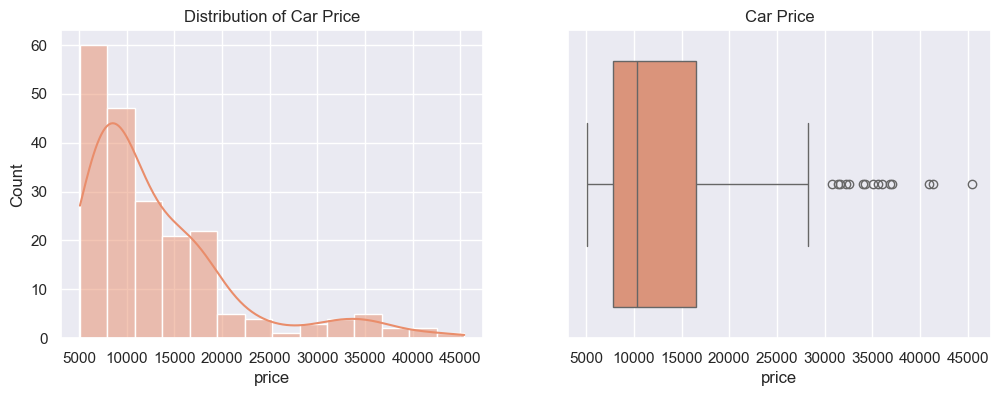

In [35]:
plt.figure(figsize=(12,4))

#plotting histogram - price distribution
plt.subplot(1,2,1)
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of Car Price')

#boxplot - price distribution
plt.subplot(1,2,2)
sns.boxplot(data=df, x='price',)
plt.title('Car Price')

plt.show()

In [36]:
print(f'Skewness: {df['price'].skew()}\nKurtosis:{df['price'].kurt()}')

Skewness: 1.7776781560914454
Kurtosis:3.051647871396399


## Insights
  - The plot or distribution of car price seems highly right skewed    
  - Most prices in the dataset are below 20000    

# Categorical Features

In [37]:
df[categorical_features].describe().T

count unique     top freq
symboling        205      6       0   67
fueltype         205      2     gas  185
aspiration       205      2     std  168
doornumber       205      2    four  115
carbody          205      5   sedan   96
drivewheel       205      3     fwd  120
enginelocation   205      2   front  202
enginetype       205      7     ohc  148
cylindernumber   205      7    four  159
fuelsystem       205      8    mpfi   94
make             205     22  toyota   32

In [38]:
def visualize_categorical(df, feature):
    plt.figure(figsize=(12,4))
    
    print(df[feature].value_counts())
    
    #countplot
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=feature, hue=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=feature, y='price', hue=feature)
    plt.title(f'{feature}')
    plt.xticks(rotation=90)
    
    plt.show()

In [39]:
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'make']

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64


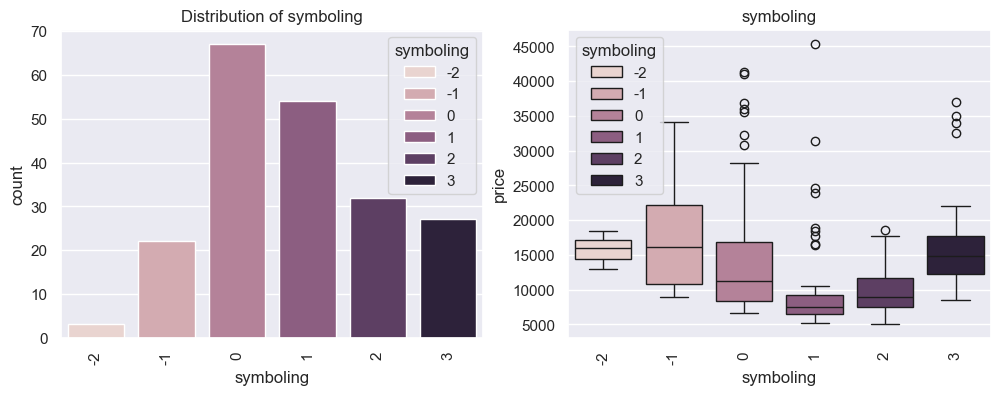

In [40]:
visualize_categorical(df,'symboling')

## Insights
  - Cars with symboling or insurance risk rating **0** and **1** (low insurance risk) are most sold.      
  - Cars with symboling **-1** and **-2** are high priced.     
  - Cars with symboling **3** have a similar price to that of -2 and -1, which is odd.   

fueltype
gas       185
diesel     20
Name: count, dtype: int64


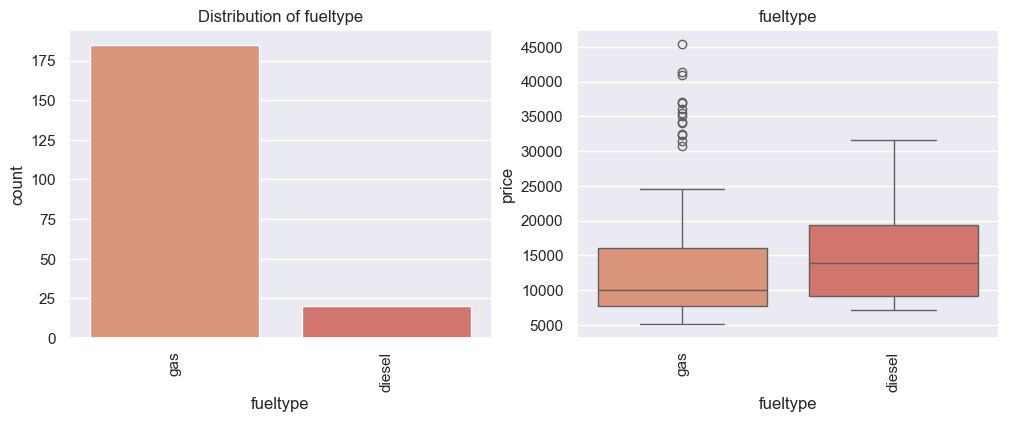

In [41]:
visualize_categorical(df,'fueltype')

## Insights
  - Cars that run on **gas** are most sold.
  - Cars that run on **diesel** are comparatively expensive than cars run on gas.

aspiration
std      168
turbo     37
Name: count, dtype: int64


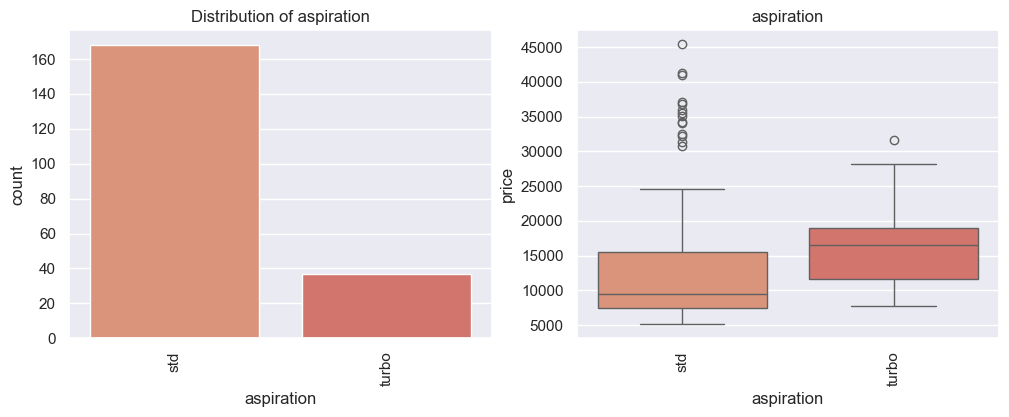

In [42]:
visualize_categorical(df,'aspiration')

## Insights
  - Cars with **standards** aspiration are most sold.
  - Cars with **turbo** aspiration are comparatively expensive than cars with standard aspiration.

doornumber
four    115
two      90
Name: count, dtype: int64


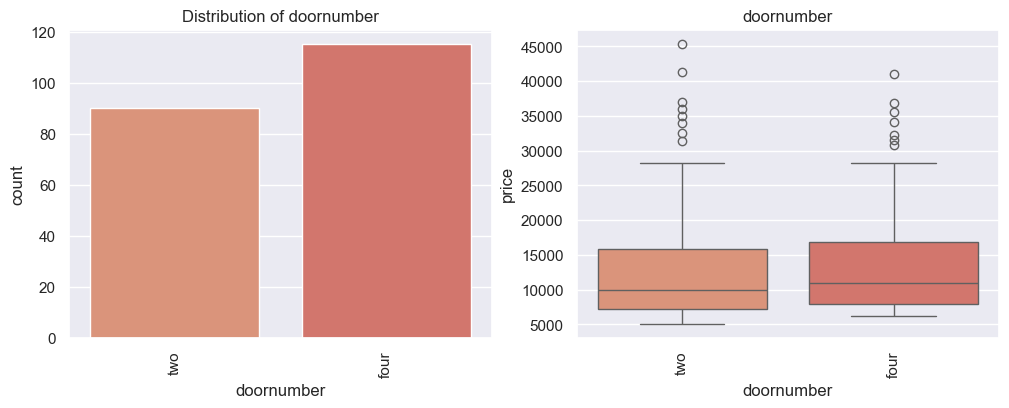

In [43]:
visualize_categorical(df,'doornumber')

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


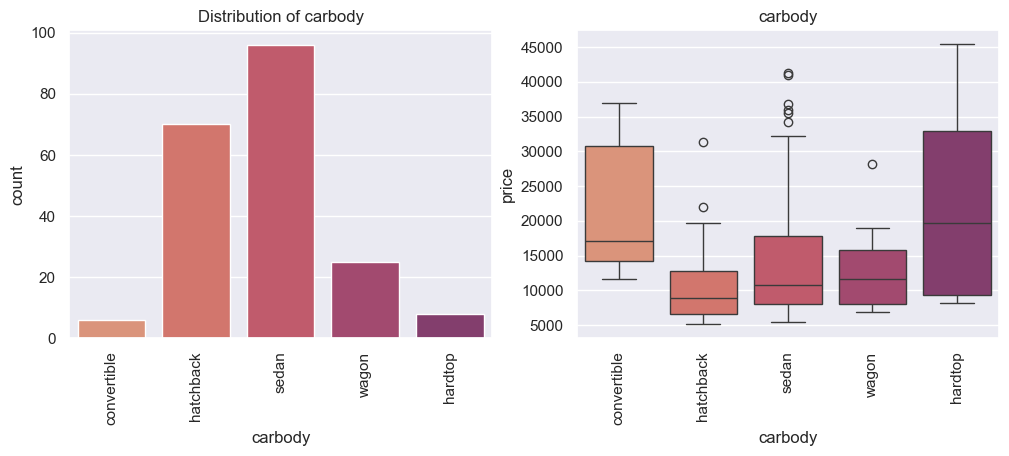

In [44]:
visualize_categorical(df,'carbody')

## Insights
  - **Sedans** are the most sold body type 
  - **convertibles** and **hardtops** have higher average prices and are availiable in a wider price range.

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


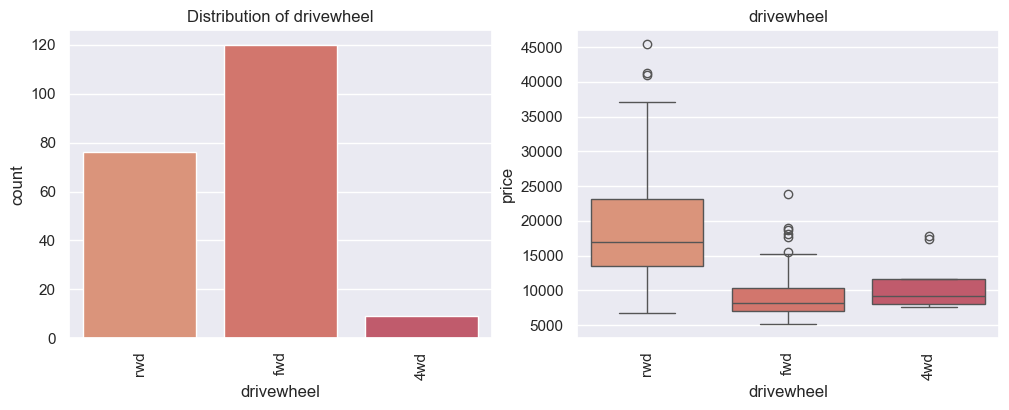

In [45]:
visualize_categorical(df,'drivewheel')

## Insights
  - Cars with **FWD** are the most sold, which is obvious. 

enginelocation
front    202
rear       3
Name: count, dtype: int64


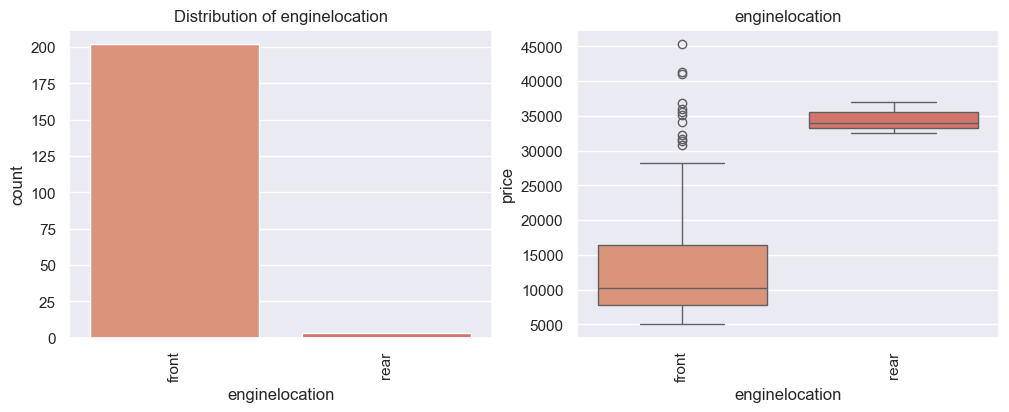

In [46]:
visualize_categorical(df,'enginelocation')

## Insights
  - Cars in which engines are located at **rear** comes at a significantly higher price range 

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


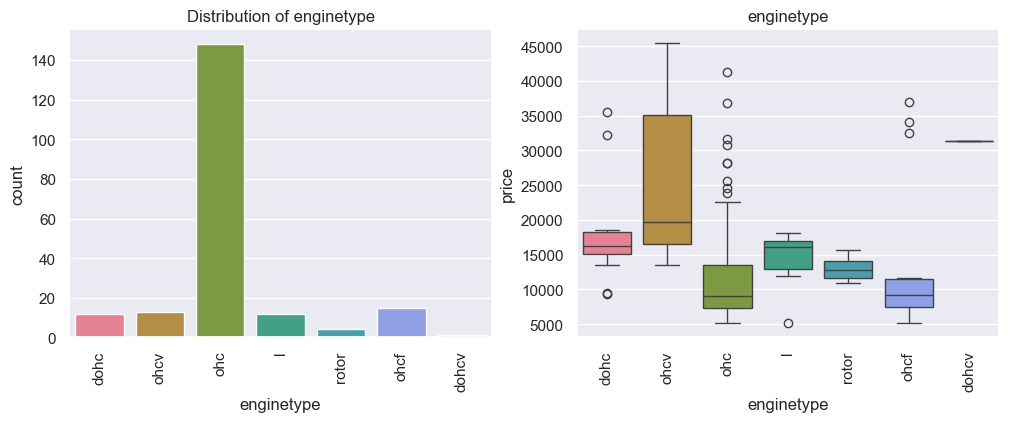

In [47]:
visualize_categorical(df,'enginetype')

## Insights
  - Cars with **ohcv** mechanism are the most sold and are offered in a wider price change.

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


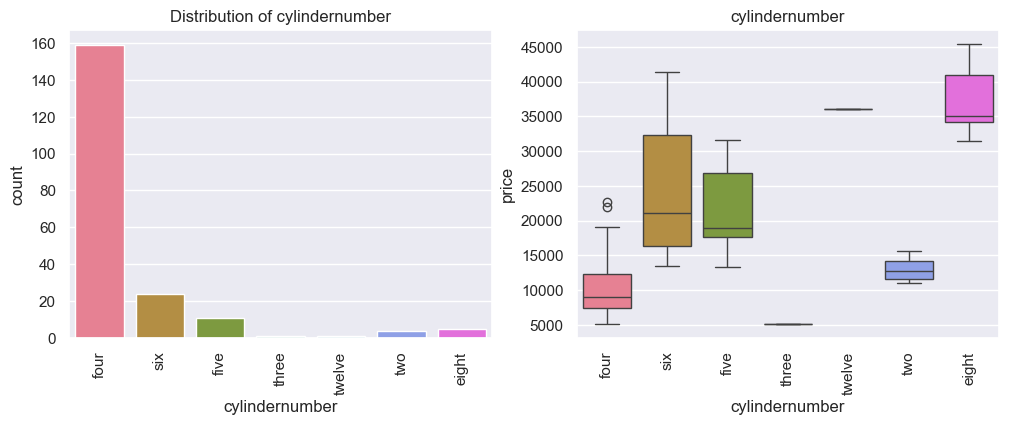

In [48]:
visualize_categorical(df,'cylindernumber')

## Insights
  - Cars with 8 and 12 cylinders comes at a higher price point.

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


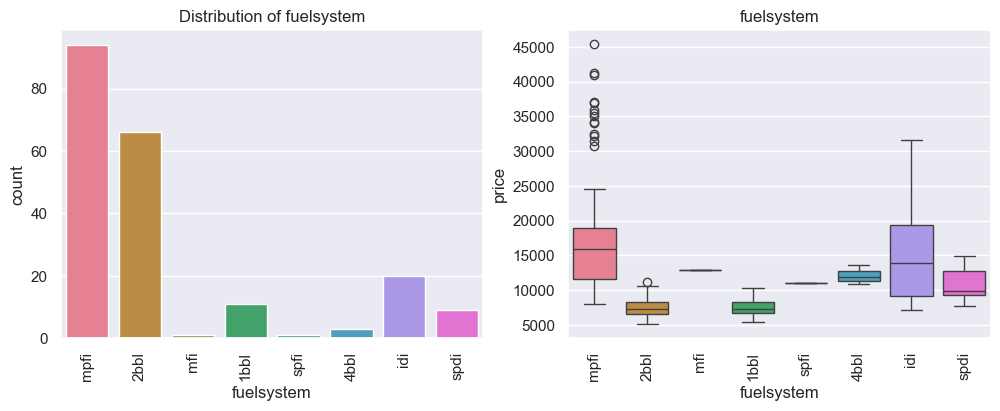

In [49]:
visualize_categorical(df,'fuelsystem')

## Insights
  - **mpfi** and **2bbl** are most common fuel systems and cars with mpfi system have higher average price.

make
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64


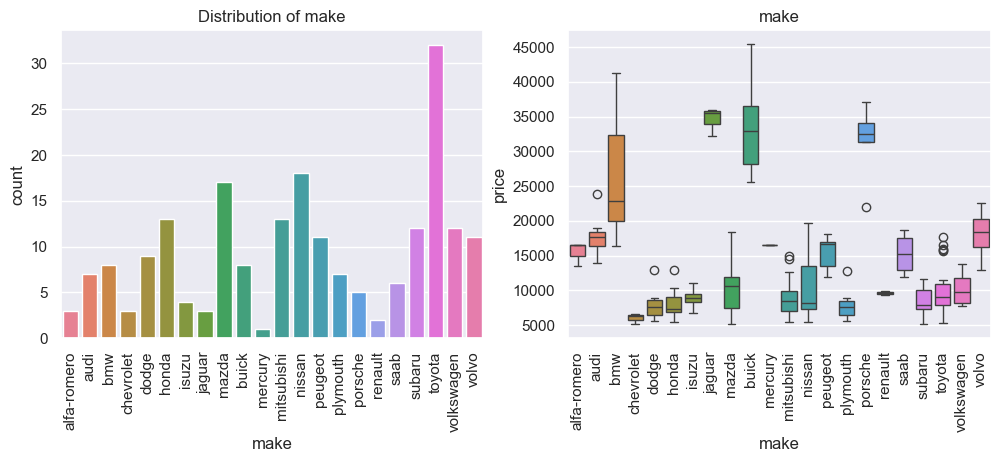

In [50]:
visualize_categorical(df,'make')

## Insights
  - **Toyota** appears to be the most preferred car brand.
  - **Jaguar**, **Buick** and **Porsche** have higher average price.

<br>

# Numerical Features

In [51]:
def visualize_numerical(df, feature):
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature}')
    
    plt.show()

In [52]:
numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

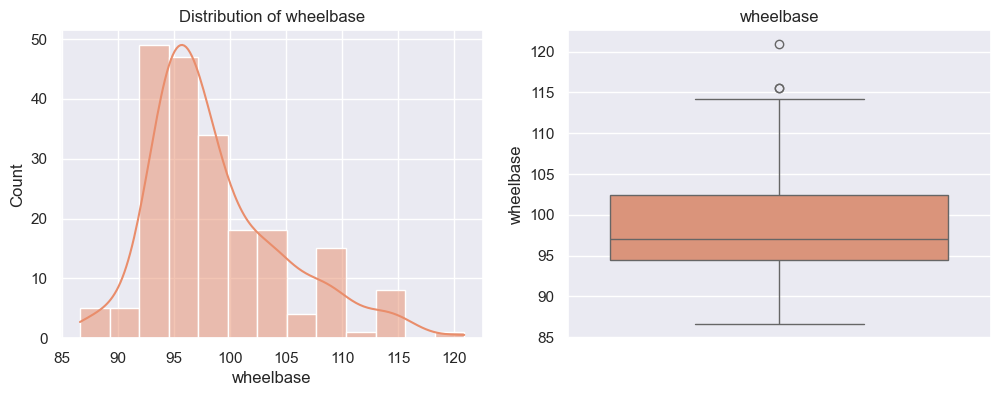

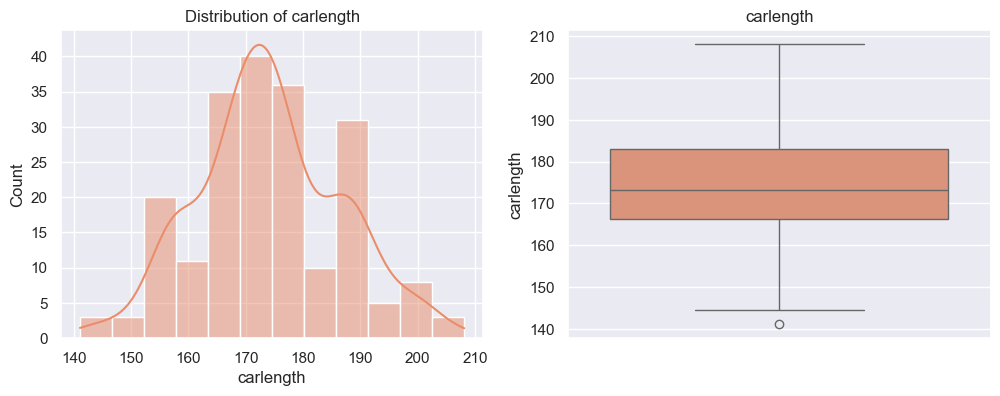

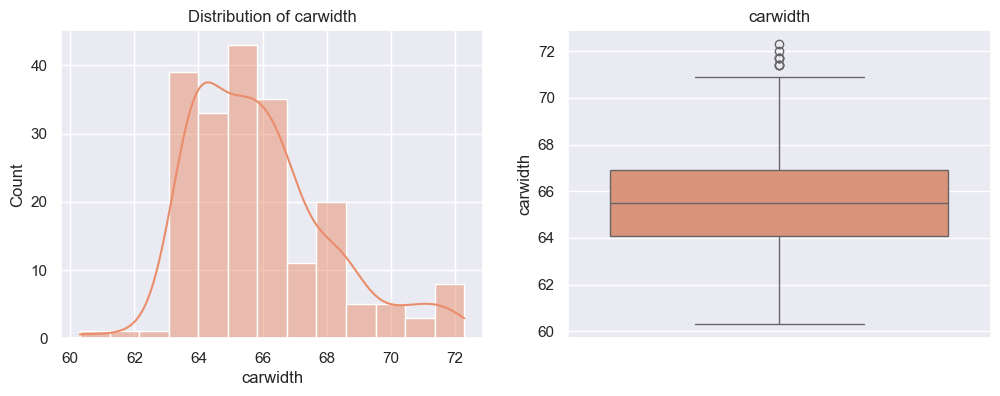

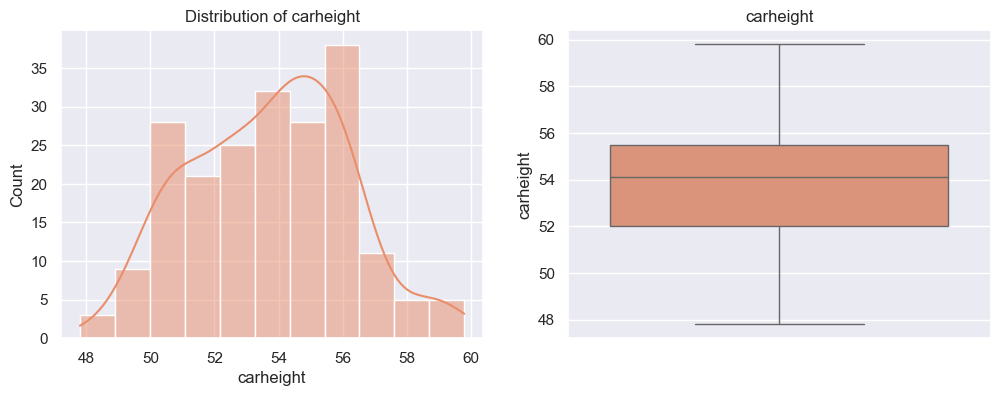

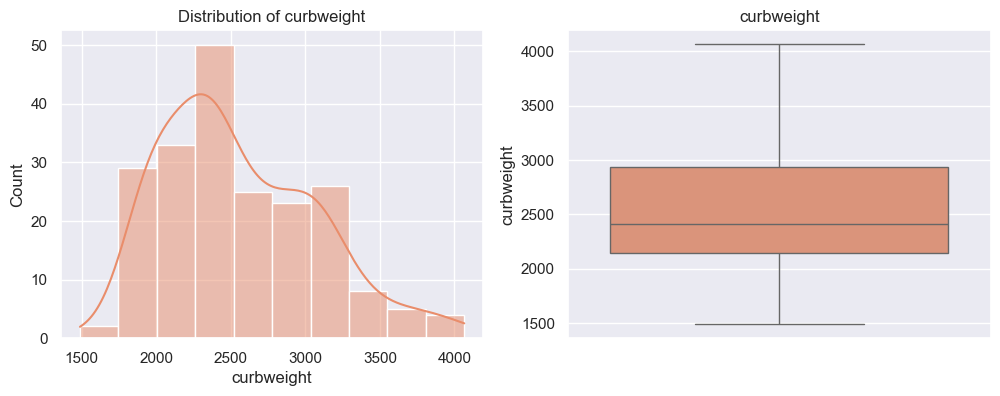

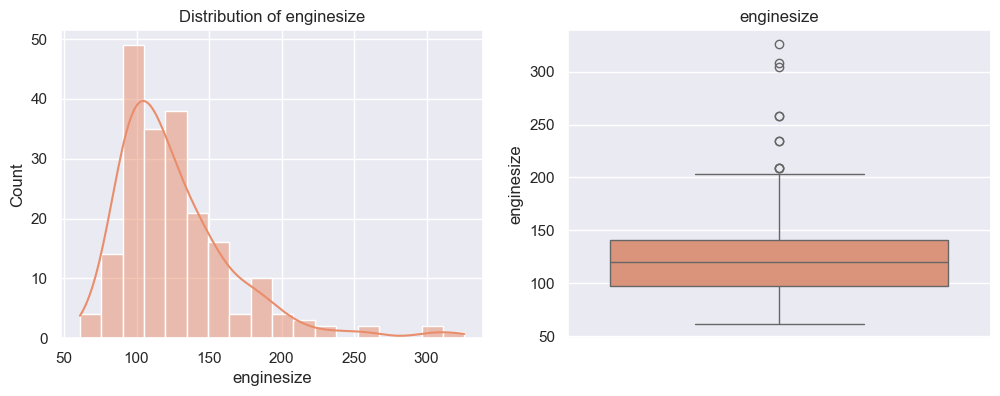

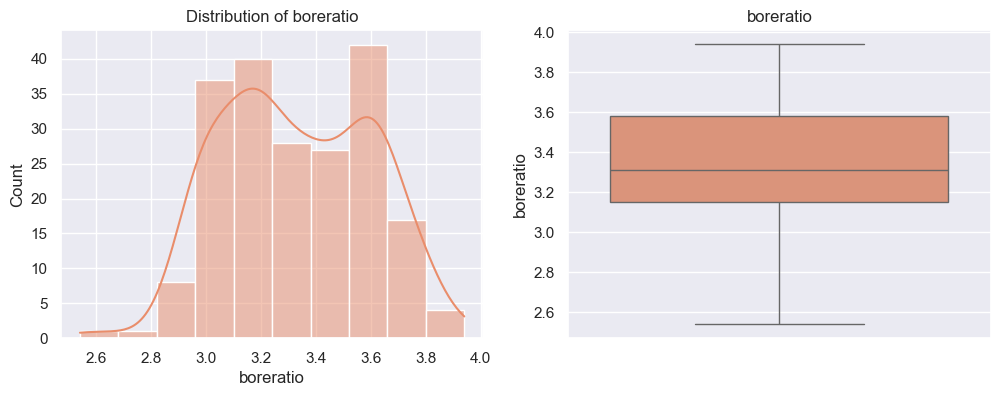

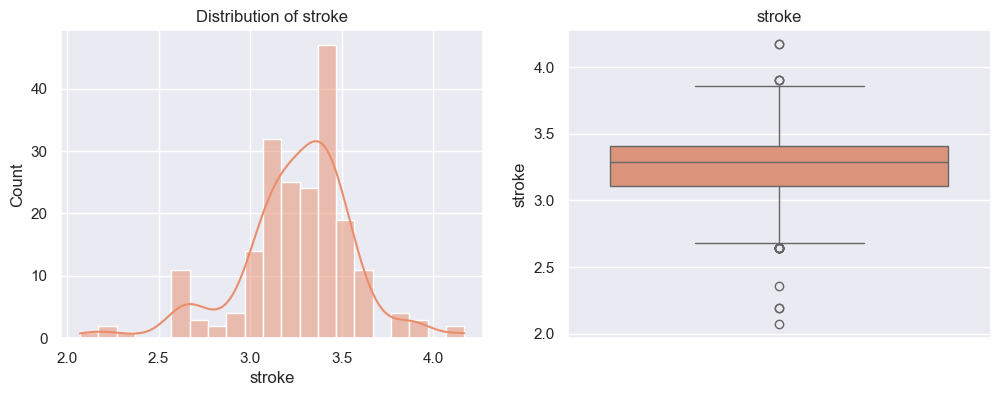

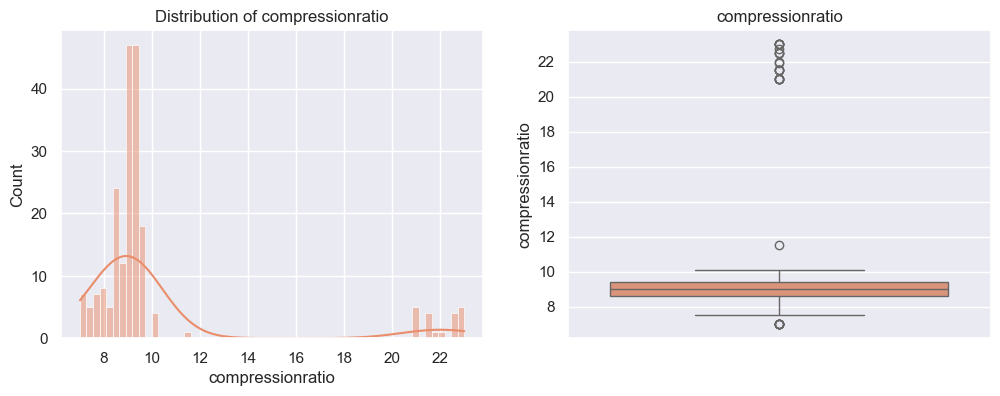

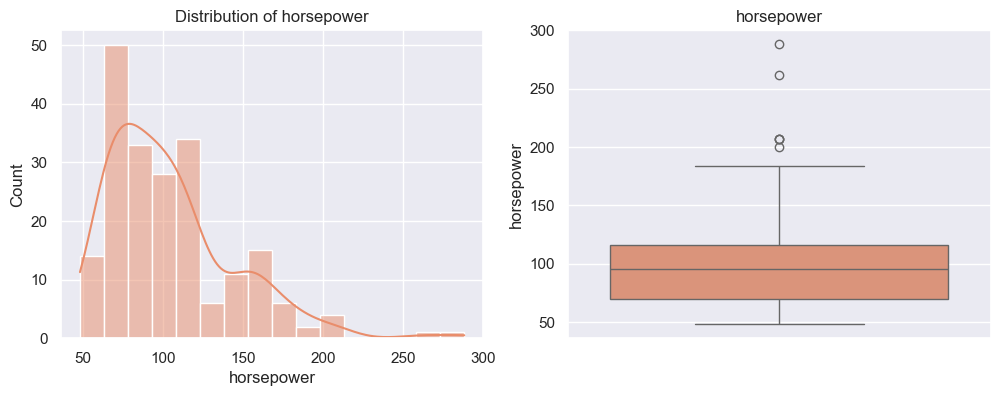

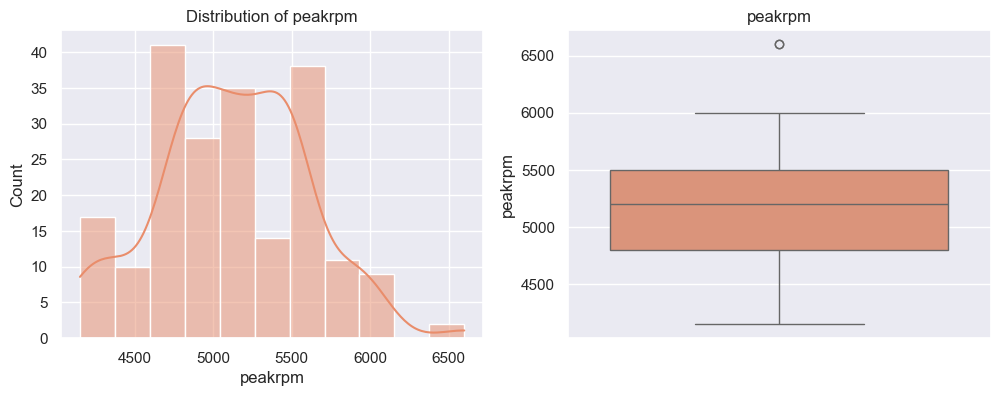

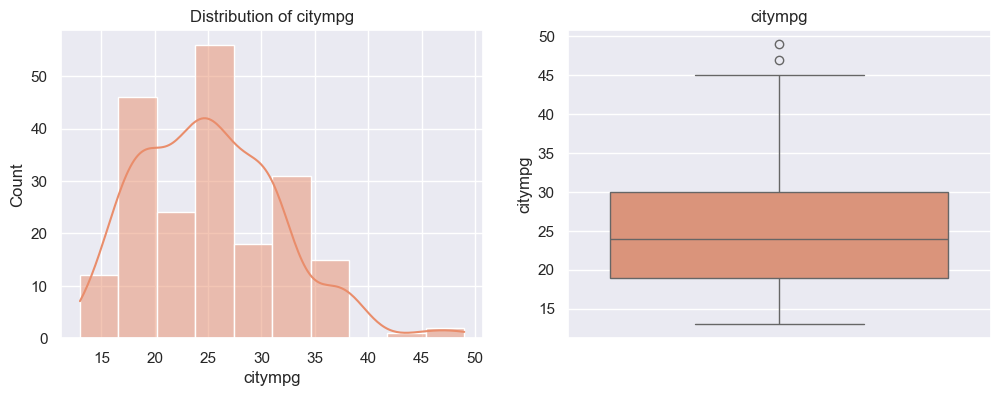

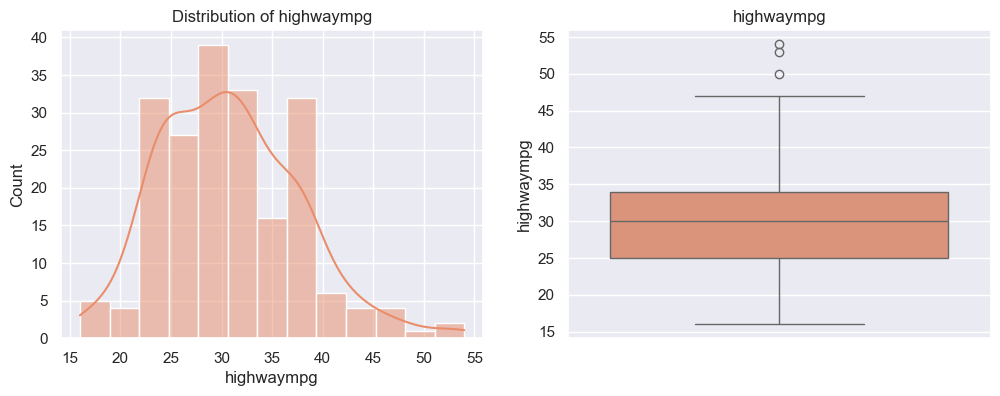

In [53]:
for feature in numerical_features:
    visualize_numerical(df, feature)

In [54]:
#defining function to create skewness kurtosis report


def create_skew_kurt_report(df, features):
    skew_values = []
    skew_types = []
    skew_levels = []
    kurt_values = []
    kurt_types = []
    for feature in features:
        skew = df[feature].skew()
        kurt = df[feature].kurt()
        skew_values.append(skew)
        kurt_values.append(kurt)
        
        #determining skewness type (+ve or -ve)
        if skew >= 0:
            skew_types.append('Positive')
        else:
            skew_types.append('Negative')
            
        #determining skewness level (low, moderate or high)
        if skew == 0:
            skew_levels.append('Symmetrical')
        elif skew < -1 or skew > 1:
            skew_levels.append('High')
        elif (skew >= -1 and skew <= -0.5) or (skew >= 0.5 and skew <= 1):
            skew_levels.append('Moderate')
        else:
            skew_levels.append('Low')
            
        #determining kurtosis type (Platykurtic, Leptokurtic, Mesokurtic)
        if kurt < 3:
            kurt_types.append('Platykurtic')
        elif kurt > 3:
            kurt_types.append('Leptokurtic')
        else:
            kurt_types.append('Mesokurtic')
            
    report = pd.DataFrame({
        'Feature': features,
        'Skewness': skew_values,
        'Skewness Type': skew_types,
        'Skewness Level': skew_levels,
        'Kurtosis': kurt_values,
        'Kurtosis Type': kurt_types
    })
    
    report.set_index('Feature', inplace=True)

    return report

In [55]:
report = create_skew_kurt_report(df, numerical_features)

In [56]:
#function to highlight 'Skewness Level' cell
def highlight_cells(val):
    if val == 'High':
        color = '#f5b7b1'  
    elif val == 'Moderate':
        color = '#f9e79f'  
    else:
        color = '#abebc6'  
    
    return f'background-color: {color}'

In [57]:
report = report.style.applymap(highlight_cells, subset=['Skewness Level'])

In [58]:
report

> <h3 style="color: #424949 ">Insight:<br><br> <i>Most features follow a near-normal distribution and have considerable number of outliers. There are 4  highly skewed features, 5 moderately skewed features and 4 features with low skewness. The features with moderate and high skewness will be transformed. </i> </h3>

In [59]:
cols_to_transform = ['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'citympg', 'highwaympg']

## Correlation Analysis - Before Scaling

In [60]:
correlation_matrix = df[numerical_features+['price']].corr()

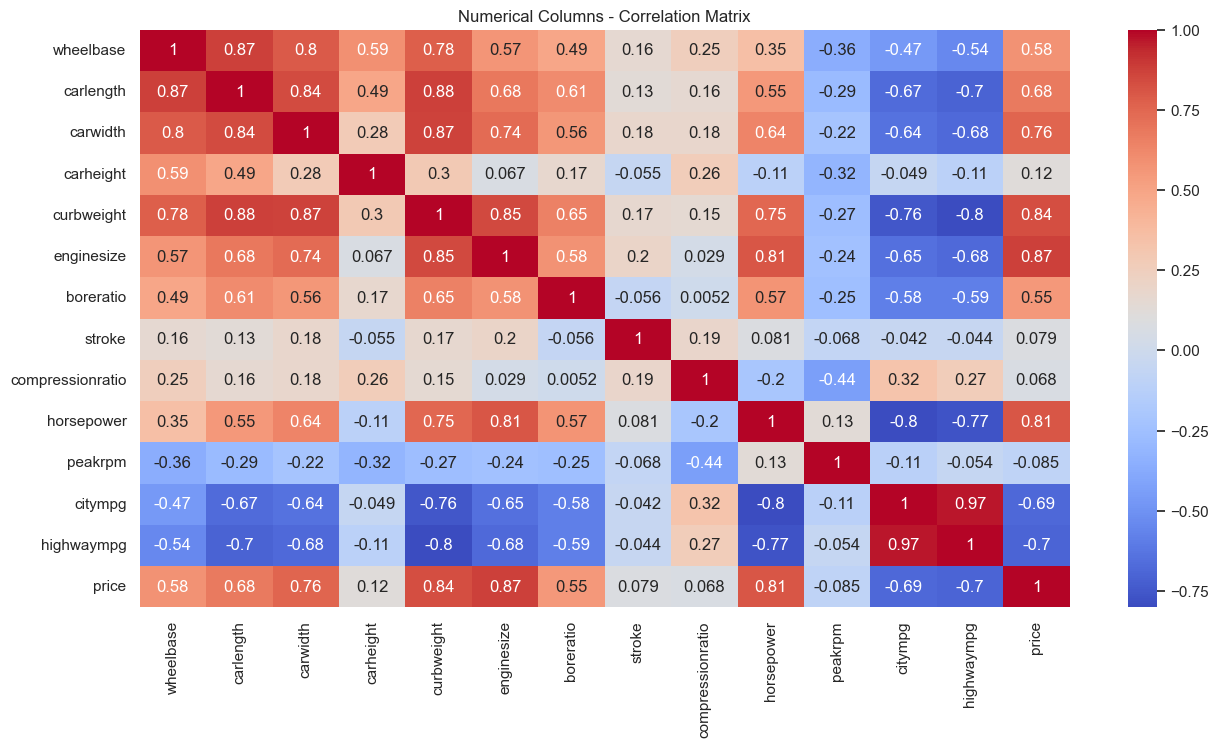

In [61]:
plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Numerical Columns - Correlation Matrix')
plt.show()

## Insights
- carwidth (0.76), curbweight (0.84), enginesize (0.87) and horsepower (0.81) are highly correlated with **car price**
- citympg (-0.69) and highwaympg (0.7) have high negative correlation with **car price**

## Interpretation
- Car width: Wider cars may indicate more spacious vehicle, which often comes with higher price range.      
- Curb weight: Heavier vehicles might be associated with better build quality or larger engines, which can result in higher price.       
- Engine size: larger engines offer more power, which typically leads to a higher price.  
- Horsepower: Higher horsepower is associated with better performance, which contribute to higher price range.
- City and Highway MPG: Fuel efficiency is typically higher affordable or economy cars, while larger or luxury vehicles often trade fuel economy off for performance or comfort, leading to a higher price.

<h2 style="color: #239b56 ">There are a number of independent features with high correlation (0.7 to 0.99 and -0.7 to -0.99)</h2>

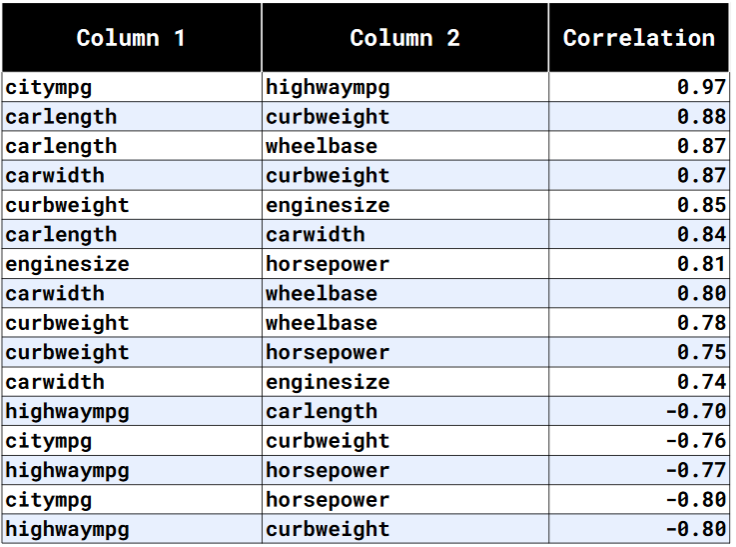

<br>

<hr>

# DATA PREPROCESSING

## Transforming Numerical Features

log transformation failed to produce desired results. Went for box-cox transformation, which is useful for stabilizing variance and making the data more normally distributed, particularly when dealing with skewed data.

In [62]:
#removed 'carwidth' from cols to transform since box-cox transformation ended up compressing all values to nearly the same point
cols_to_transform = ['wheelbase', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'citympg', 'highwaympg']

In [63]:
#checking for non-positive values
df[numerical_features].describe().loc['min']

wheelbase             86.60
carlength            141.10
carwidth              60.30
carheight             47.80
curbweight          1488.00
enginesize            61.00
boreratio              2.54
stroke                 2.07
compressionratio       7.00
horsepower            48.00
peakrpm             4150.00
citympg               13.00
highwaympg            16.00
Name: min, dtype: float64

In [64]:
from scipy import stats
df_transformed = df.copy()
#box-cox transformation on specific columns
for col in cols_to_transform:
    df_transformed[col] = np.where(df_transformed[col] > 0, stats.boxcox(df_transformed[col])[0], df_transformed[col])

In [76]:
#repeated cuberoot transformation worked for 'carwidth'(x9)
df_transformed['carwidth'] = np.where(df_transformed['carwidth'] > 0,np.cbrt(df_transformed['carwidth']), df_transformed['carwidth'])

In [77]:
report1 = create_skew_kurt_report(df_transformed, numerical_features)

In [78]:
report1 = report1.style.applymap(highlight_cells, subset=['Skewness Level'])

In [79]:
report1

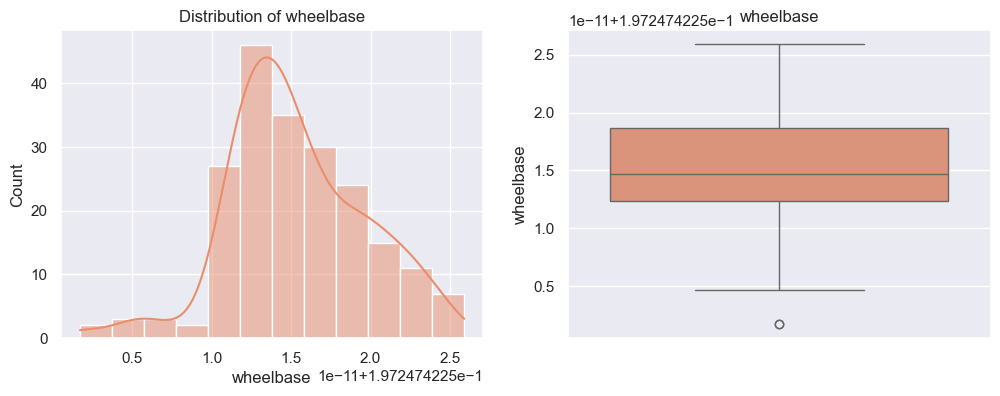

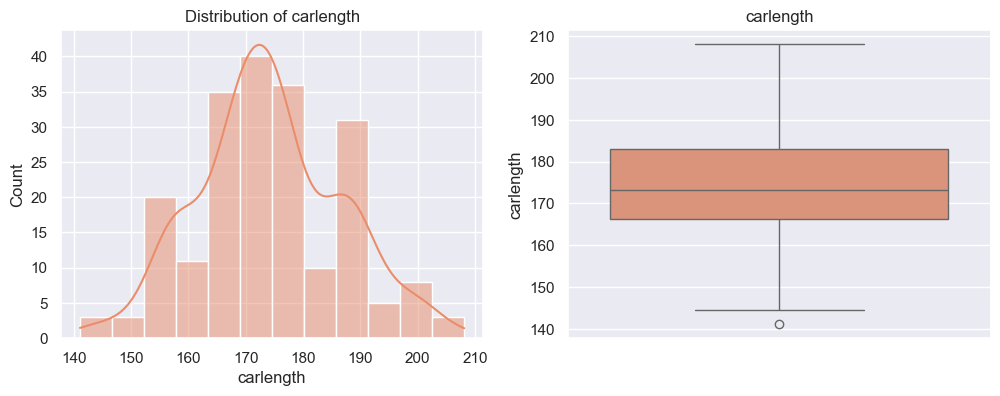

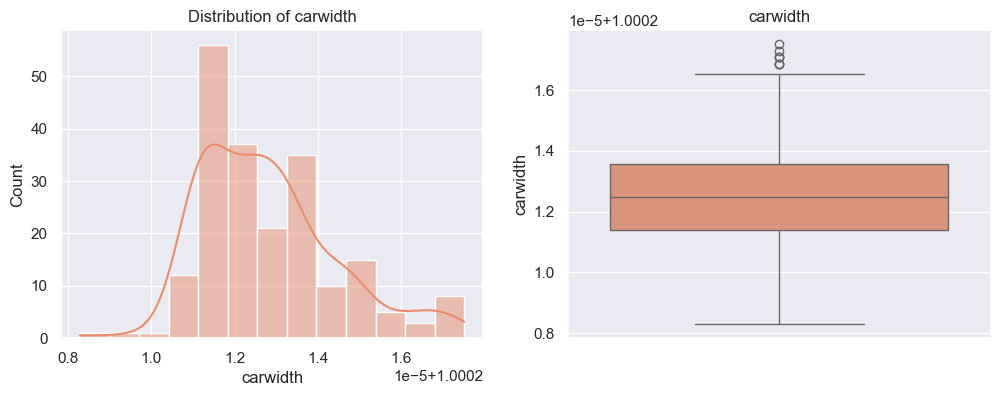

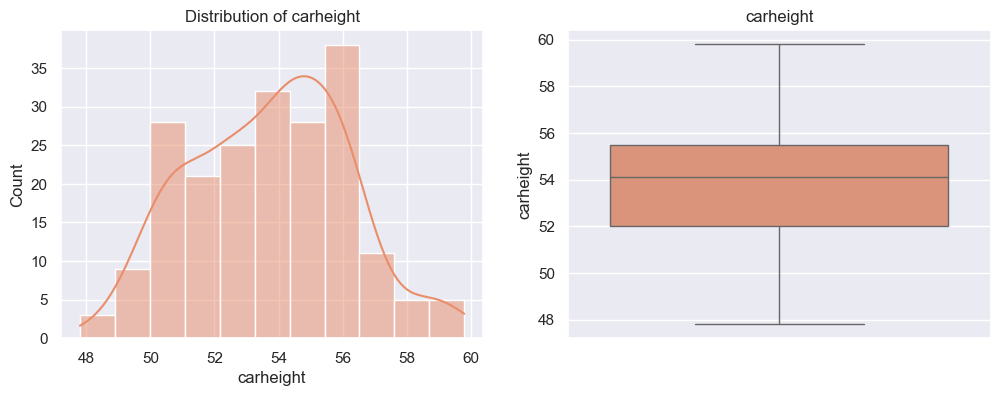

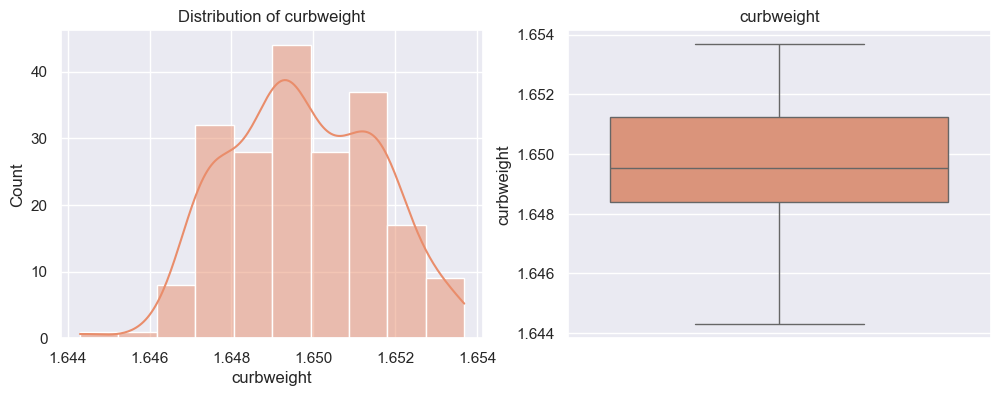

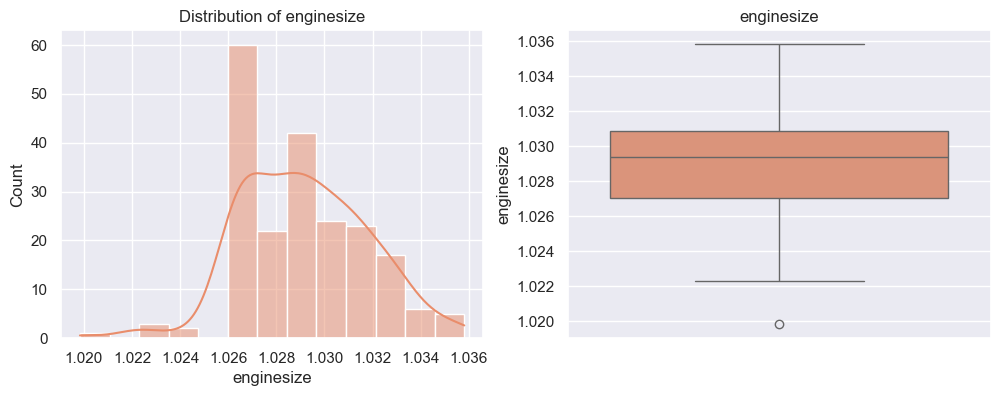

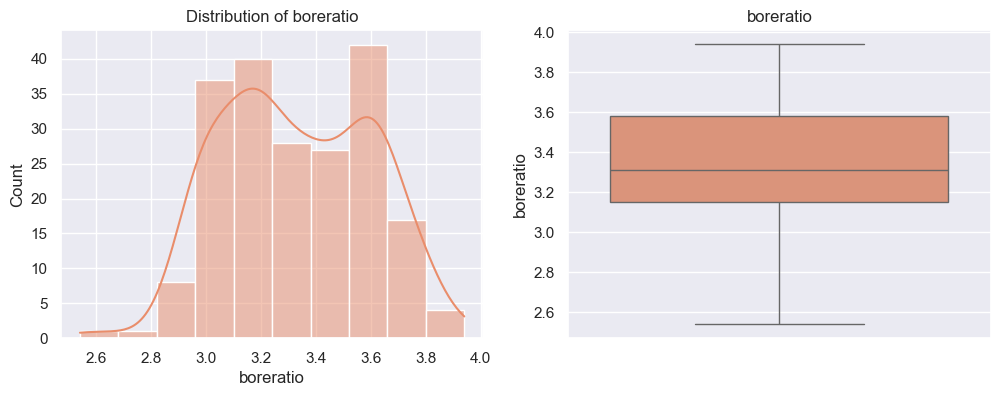

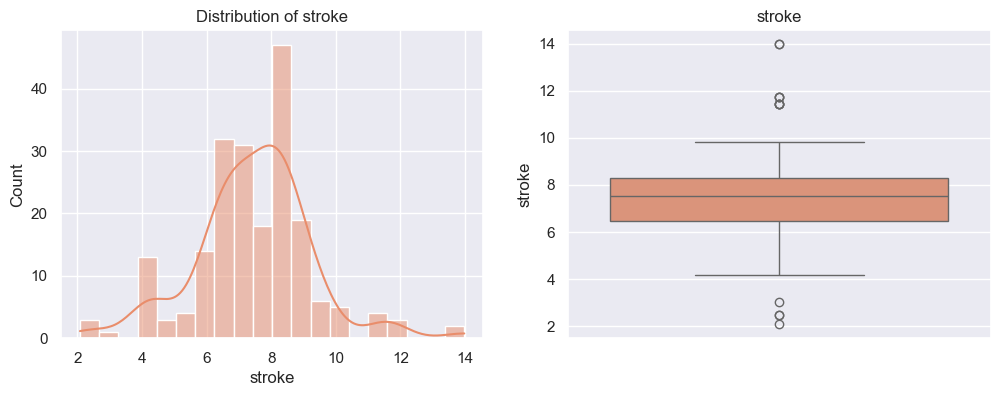

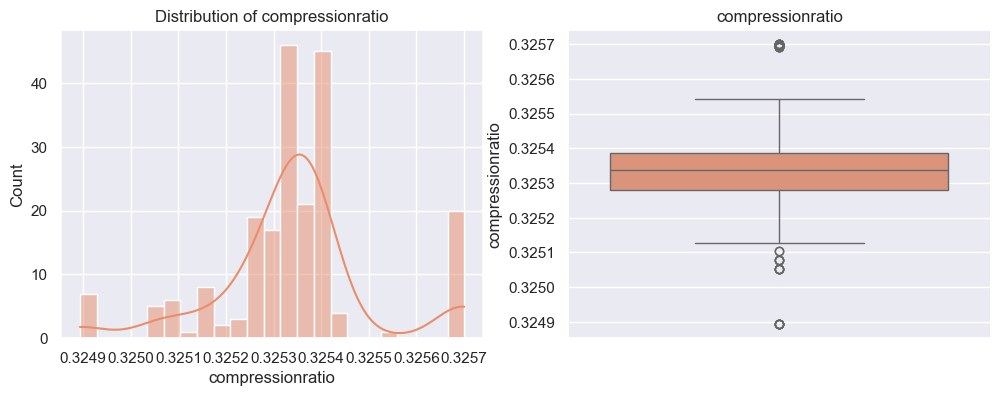

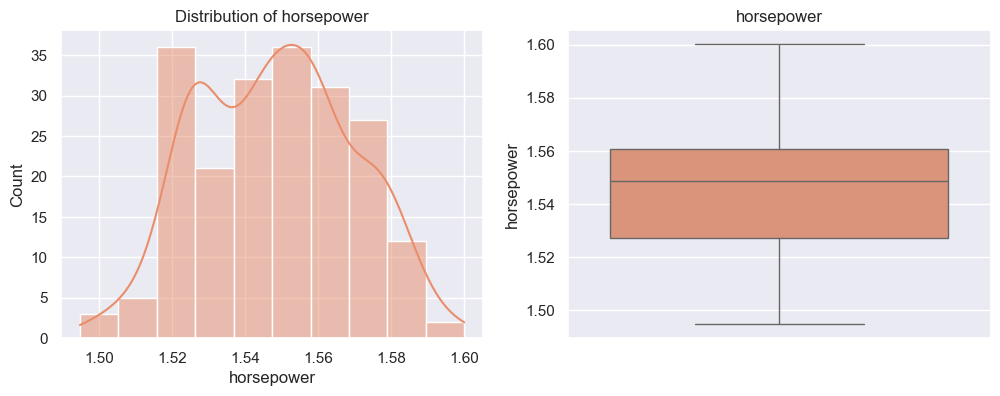

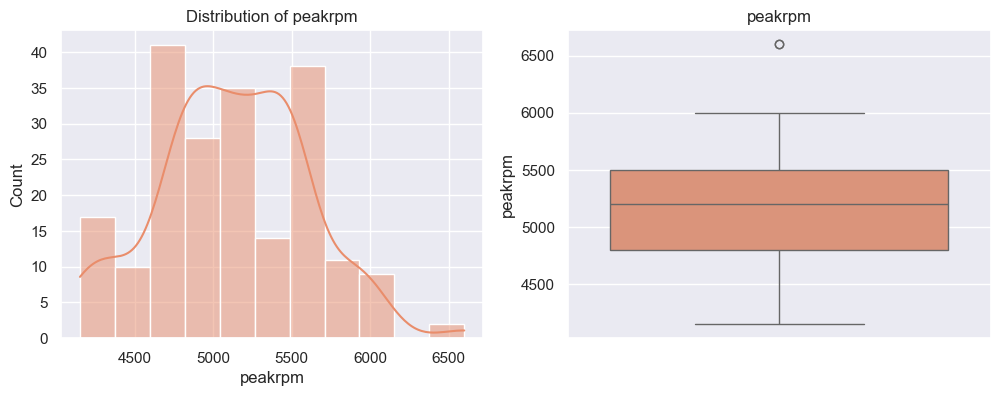

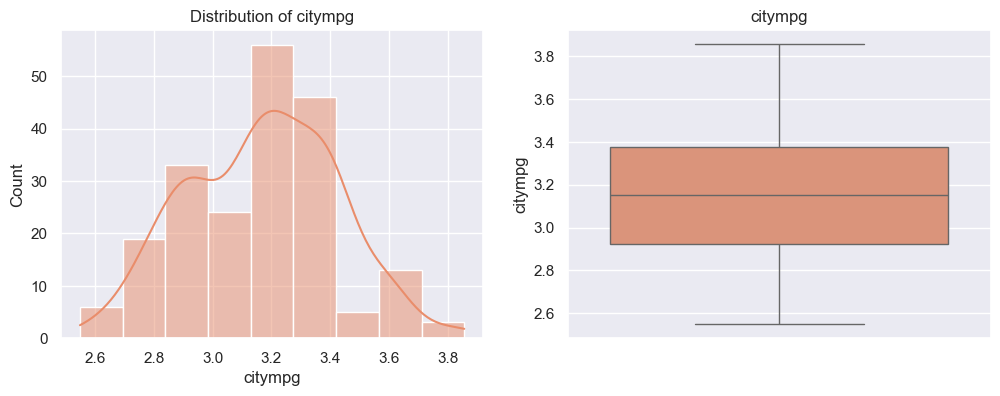

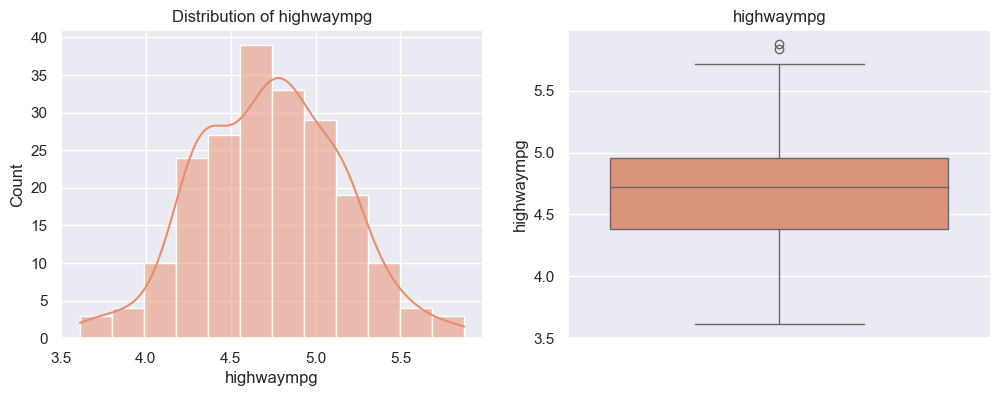

In [80]:
for feature in numerical_features:
    visualize_numerical(df_transformed, feature)

## Transforming 'price'

In [81]:
df_transformed['price'] = stats.boxcox(df_transformed[col])[0]

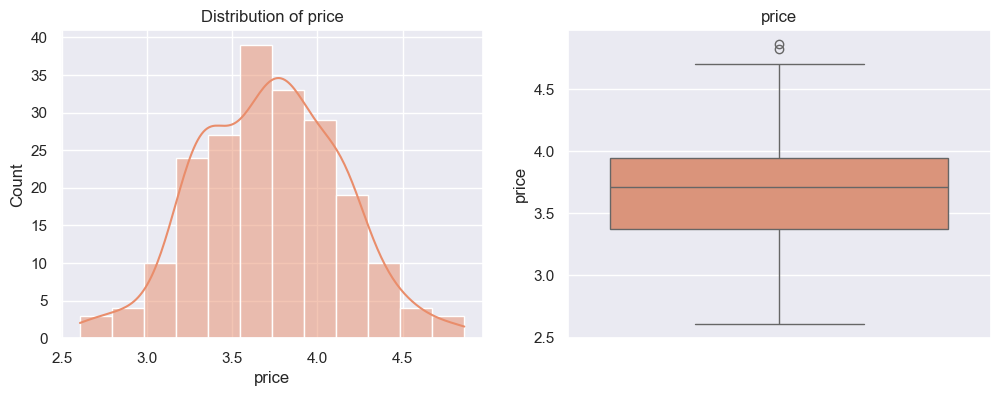

In [82]:
visualize_numerical(df_transformed, 'price')

In [83]:
df_transformed['price'].skew()

-0.0012603104458931151

In [84]:
df_transformed['price'].kurt()

-0.013135237464321659

<br>

> <h3 style="color: #424949 ">Note:<br><br> <i>There are minimal outliers after transformations. Outliers are not capped or removed since we use models that are sensitive and not sensitive to outliers. </i> </h3>

## Encoding Categorical Columns (OHE)

In [85]:
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'make']

In [86]:
df_encoded = pd.get_dummies(df_transformed, columns=categorical_features, drop_first=True)

In [87]:
df_encoded.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'make_audi', 'make_bmw',
       'make_buick', 'make_chevrolet', 'make_dodge', 'make

In [88]:
df_transformed.shape

(205, 25)

In [89]:
df_encoded.shape

(205, 69)

In [90]:
df_transformed.head(1)

symboling fueltype aspiration doornumber      carbody drivewheel  \
0         3      gas        std        two  convertible        rwd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front   0.197247      168.8  1.000211       48.8    1.650015   

  enginetype cylindernumber  enginesize fuelsystem  boreratio    stroke  \
0       dohc           four    1.030153       mpfi       3.47  4.336946   

   compressionratio  horsepower  peakrpm   citympg  highwaympg     price  \
0          0.325339    1.558115     5000  3.022118    4.524479  3.515887   

          make  
0  alfa-romero

In [91]:
df_encoded.head(1)

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0   0.197247      168.8  1.000211       48.8    1.650015    1.030153   

   boreratio    stroke  compressionratio  horsepower  peakrpm   citympg  \
0       3.47  4.336946          0.325339    1.558115     5000  3.022118   

   highwaympg     price  symboling_-1  symboling_0  symboling_1  symboling_2  \
0    4.524479  3.515887         False        False        False        False   

   symboling_3  fueltype_gas  aspiration_turbo  doornumber_two  \
0         True          True             False            True   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0            False              False          False          False   

   drivewheel_fwd  drivewheel_rwd  enginelocation_rear  enginetype_dohcv  \
0           False            True                False             False   

   enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
0         False           False            False            False   

   enginetype_rotor  cylindernumber_five  cylindernumber_four  \
0             False                False                 True   

   cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
0               False                 False                  False   

   cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0               False            False            False           False   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0           False             True            False            False   

   make_audi  make_bmw  make_buick  make_chevrolet  make_dodge  make_honda  \
0      False     False       False           False       False       False   

   make_isuzu  make_jaguar  make_mazda  make_mercury  make_mitsubishi  \
0       False        False       False         False            False   

   make_nissan  make_peugeot  make_plymouth  make_porsche  make_renault  \
0        False         False          False         False         False   

   make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  
0      False        False        False            False       False

In [92]:
df_encoded = df_encoded.replace({False:0, True:1})

In [93]:
df_encoded.head(1)

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0   0.197247      168.8  1.000211       48.8    1.650015    1.030153   

   boreratio    stroke  compressionratio  horsepower  peakrpm   citympg  \
0       3.47  4.336946          0.325339    1.558115     5000  3.022118   

   highwaympg     price  symboling_-1  symboling_0  symboling_1  symboling_2  \
0    4.524479  3.515887             0            0            0            0   

   symboling_3  fueltype_gas  aspiration_turbo  doornumber_two  \
0            1             1                 0               1   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   

   drivewheel_fwd  drivewheel_rwd  enginelocation_rear  enginetype_dohcv  \
0               0               1                    0                 0   

   enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
0             0               0                0                0   

   enginetype_rotor  cylindernumber_five  cylindernumber_four  \
0                 0                    0                    1   

   cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
0                   0                     0                      0   

   cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                   0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   

   make_audi  make_bmw  make_buick  make_chevrolet  make_dodge  make_honda  \
0          0         0           0               0           0           0   

   make_isuzu  make_jaguar  make_mazda  make_mercury  make_mitsubishi  \
0           0            0           0             0                0   

   make_nissan  make_peugeot  make_plymouth  make_porsche  make_renault  \
0            0             0              0             0             0   

   make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  
0          0            0            0                0           0

<br>

## Scaling Features

we will use robust scaler that scales the data according to the median and the interquartile range (IQR), making it more robust against outliers.

In [94]:
X = df_encoded.drop('price', axis=1) #features
y = df_encoded['price'] #target

In [95]:
numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [96]:
X_scaled = X.copy()

In [97]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled[numerical_features] = scaler.fit_transform(X_scaled[numerical_features])

In [98]:
X.head(1)

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0   0.197247      168.8  1.000211       48.8    1.650015    1.030153   

   boreratio    stroke  compressionratio  horsepower  peakrpm   citympg  \
0       3.47  4.336946          0.325339    1.558115     5000  3.022118   

   highwaympg  symboling_-1  symboling_0  symboling_1  symboling_2  \
0    4.524479             0            0            0            0   

   symboling_3  fueltype_gas  aspiration_turbo  doornumber_two  \
0            1             1                 0               1   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   

   drivewheel_fwd  drivewheel_rwd  enginelocation_rear  enginetype_dohcv  \
0               0               1                    0                 0   

   enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
0             0               0                0                0   

   enginetype_rotor  cylindernumber_five  cylindernumber_four  \
0                 0                    0                    1   

   cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
0                   0                     0                      0   

   cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                   0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   

   make_audi  make_bmw  make_buick  make_chevrolet  make_dodge  make_honda  \
0          0         0           0               0           0           0   

   make_isuzu  make_jaguar  make_mazda  make_mercury  make_mitsubishi  \
0           0            0           0             0                0   

   make_nissan  make_peugeot  make_plymouth  make_porsche  make_renault  \
0            0             0              0             0             0   

   make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  
0          0            0            0                0           0

In [99]:
X_scaled.head(1)

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0  -1.526907  -0.261905 -0.505344  -1.514286    0.173246    0.199842   

   boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
0   0.372093 -1.781655               0.0    0.283761 -0.285714 -0.292433   

   highwaympg  symboling_-1  symboling_0  symboling_1  symboling_2  \
0   -0.341104             0            0            0            0   

   symboling_3  fueltype_gas  aspiration_turbo  doornumber_two  \
0            1             1                 0               1   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   

   drivewheel_fwd  drivewheel_rwd  enginelocation_rear  enginetype_dohcv  \
0               0               1                    0                 0   

   enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
0             0               0                0                0   

   enginetype_rotor  cylindernumber_five  cylindernumber_four  \
0                 0                    0                    1   

   cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
0                   0                     0                      0   

   cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                   0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   

   make_audi  make_bmw  make_buick  make_chevrolet  make_dodge  make_honda  \
0          0         0           0               0           0           0   

   make_isuzu  make_jaguar  make_mazda  make_mercury  make_mitsubishi  \
0           0            0           0             0                0   

   make_nissan  make_peugeot  make_plymouth  make_porsche  make_renault  \
0            0             0              0             0             0   

   make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  
0          0            0            0                0           0

## Correlation Analysis - After Scaling

In [100]:
correlation_matrix1 = pd.merge(X_scaled, y, right_index=True, left_index=True).corr()

In [101]:
price_correlation = correlation_matrix1[['price']]

In [102]:
sorted_top20_corr = price_correlation.reindex(price_correlation['price'].abs().sort_values(ascending=False).index).head(20)

In [105]:
sorted_top20_corr.drop(index='price', inplace=True)

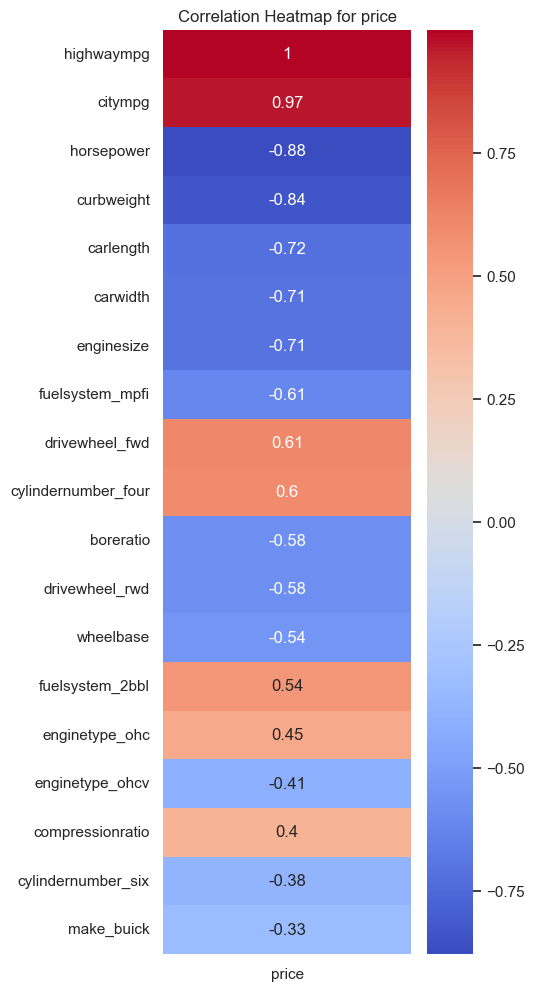

In [106]:
plt.figure(figsize=(4, 12))
sns.heatmap(sorted_top20_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Correlation Heatmap for price')
plt.show()

<br>

## Splitting Train - Test Data

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [108]:
X_train.shape

(164, 68)

In [109]:
X_test.shape

(41, 68)

In [110]:
y_train.shape

(164,)

In [111]:
y_test.shape

(41,)

<br>

## Feature Selection

In [115]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_RFE=X_train[selected_features] 
print(selected_features)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'enginetype_ohc',
       'enginetype_ohcv'],
      dtype='object')


In [116]:
RFE_corr = pd.merge(X_test[selected_features], df_encoded[['price']], left_index=True, right_index=True).corr()

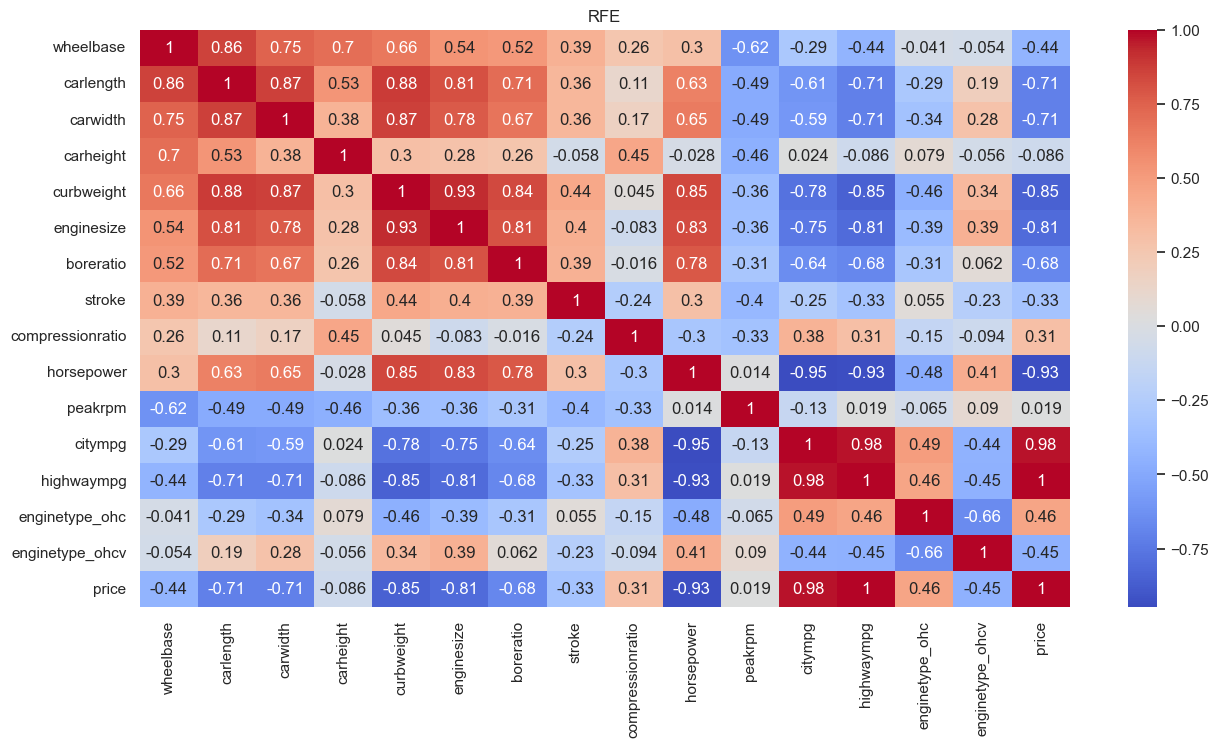

In [117]:
plt.figure(figsize=(15, 7.5))
sns.heatmap(RFE_corr, annot=True, cmap='coolwarm')
plt.title('RFE')
plt.show()

In [118]:
X_train_final = X_RFE.copy()

In [119]:
X_train_final.shape

(164, 15)

In [120]:
X_test_final = X_test[selected_features]

In [121]:
X_test_final.shape

(41, 15)

<br>

<hr>

# MODEL IMPLEMENTATION

### Linear Regression

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Decision Tree Regressor

In [123]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

### Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

### Gradient Boosting Regressor

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

### Support Vector Regressor

In [126]:
from sklearn.svm import SVR
svr = SVR()

<br>

<hr>

# MODEL EVALUATION

In [127]:
models=[lr, dt, rf, gbr, svr]

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model_names = {}
r2_scores = {}
mse_train = {}
mse_test = {}
mae_train = {}
mae_test = {}

for model in models:
    model_names[model] = model.__class__.__name__
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    r2_scores[model] = r2_score(y_test, y_pred)
    mse_train[model] = mean_squared_error(y_train, model.predict(X_train_final)) 
    mse_test[model] = mean_squared_error(y_test, y_pred)
    mae_train[model] = mean_absolute_error(y_train, model.predict(X_train_final)) 
    mae_test[model] = mean_absolute_error(y_test, y_pred)

In [129]:
df_model_scores = pd.DataFrame({
    'Model': model_names.values(),
    'R2 Score': r2_scores.values(),
    'MSE - Train': mse_train.values(),
    'MSE - Test': mse_test.values(),
    'MAE - Train': mae_train.values(),
    'MAE - Test': mae_test.values()
})

In [130]:
df_model_scores

Model  R2 Score   MSE - Train    MSE - Test  \
0           LinearRegression  1.000000  3.139167e-09  3.773687e-09   
1      DecisionTreeRegressor  0.997741  3.968355e-31  3.519840e-04   
2      RandomForestRegressor  0.998186  1.558388e-04  2.826120e-04   
3  GradientBoostingRegressor  0.999608  3.288592e-10  6.106170e-05   
4                        SVR  0.964415  4.584117e-03  5.545339e-03   

    MAE - Train  MAE - Test  
0  3.947233e-05    0.000043  
1  4.440892e-16    0.004955  
2  5.075101e-03    0.007489  
3  1.219890e-05    0.001925  
4  5.802713e-02    0.060754

### Predicted vs Real Values

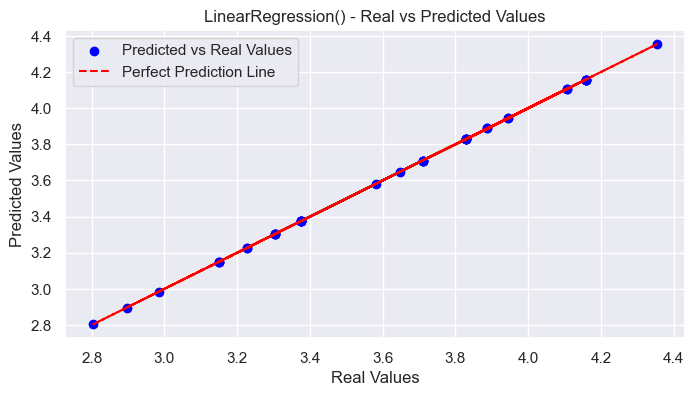

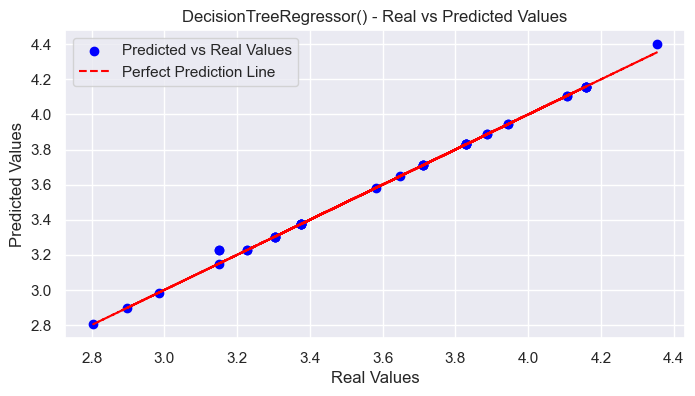

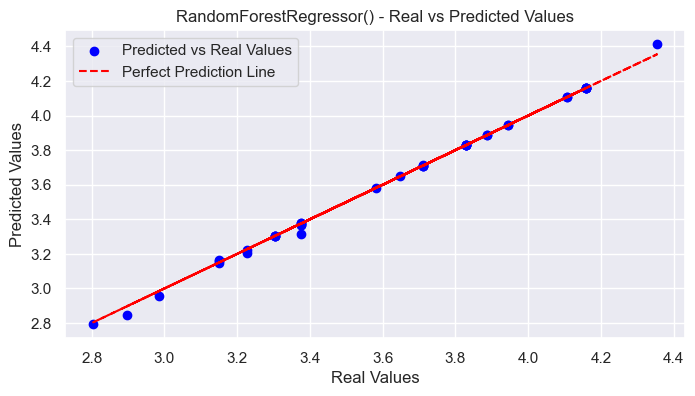

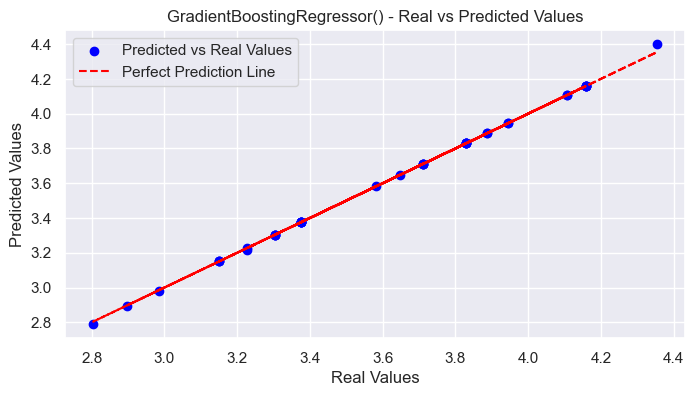

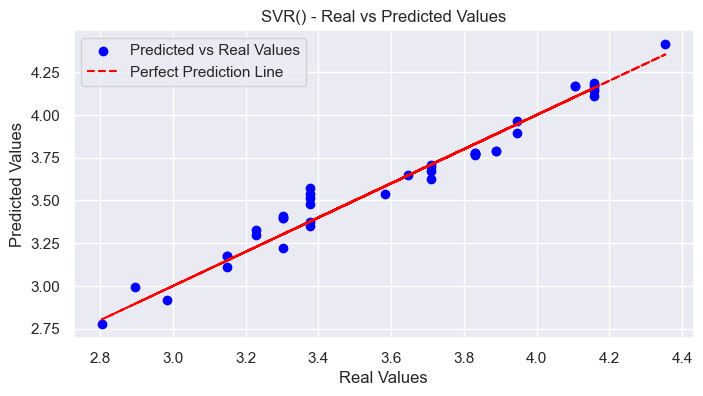

In [131]:
for model in models:
    y_pred = model.predict(X_test_final)

    #real values vs predicted values
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real Values')
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')
    plt.title(f'{model} - Real vs Predicted Values')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

<br>

## K-fold Cross Validation

In [142]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    scores = cross_val_score(model, X_scaled[selected_features], y, cv=kf, scoring='neg_mean_squared_error')
    print(f'{model.__class__.__name__}: Mean MSE = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}')

LinearRegression: Mean MSE = -0.0000, Std = 0.0000
DecisionTreeRegressor: Mean MSE = -0.0021, Std = 0.0018
RandomForestRegressor: Mean MSE = -0.0014, Std = 0.0013
GradientBoostingRegressor: Mean MSE = -0.0004, Std = 0.0004
SVR: Mean MSE = -0.0193, Std = 0.0163


## Hyperparameter Tuning

In [132]:
from sklearn.model_selection import GridSearchCV

In [137]:
models_and_params = {
    'LinearRegression': (LinearRegression(), {}),
    
    'DecisionTreeRegressor': (
        DecisionTreeRegressor(),
        {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    
    'RandomForestRegressor': (
        RandomForestRegressor(),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    
    'GradientBoostingRegressor': (
        GradientBoostingRegressor(),
        {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    
    'SVR': (
        SVR(),
        {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    )
}


results = {}

#hyperparameter tuning
for model_name, (model, params) in models_and_params.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    if model_name == 'LinearRegression':
        model.fit(X_train_final, y_train)
        y_pred = model.predict(X_test_final)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        best_params = {}
    else:
        grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_final, y_train)
        
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        y_pred = best_model.predict(X_test_final)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'Best Params': best_params,
                           'MSE': mse,
                           'R2': r2}


resultss = pd.DataFrame(results).T
print("\nHyperparameter tuning results:")
print(resultss)

Tuning hyperparameters for LinearRegression...
Tuning hyperparameters for DecisionTreeRegressor...
Tuning hyperparameters for RandomForestRegressor...
Tuning hyperparameters for GradientBoostingRegressor...
Tuning hyperparameters for SVR...

Hyperparameter tuning results:
                                                                 Best Params  \
LinearRegression                                                          {}   
DecisionTreeRegressor      {'max_depth': 10, 'min_samples_leaf': 1, 'min_...   
RandomForestRegressor      {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
GradientBoostingRegressor  {'learning_rate': 0.2, 'max_depth': 3, 'min_sa...   
SVR                           {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}   

                                MSE        R2  
LinearRegression                0.0       1.0  
DecisionTreeRegressor      0.000448  0.997126  
RandomForestRegressor      0.000451  0.997107  
GradientBoostingRegressor  0.000116  0.999255  
SVR   

In [136]:
df_model_scores.round(6)

Model  R2 Score  MSE - Train  MSE - Test  MAE - Train  \
0           LinearRegression  1.000000     0.000000    0.000000     0.000039   
1      DecisionTreeRegressor  0.997741     0.000000    0.000352     0.000000   
2      RandomForestRegressor  0.998186     0.000156    0.000283     0.005075   
3  GradientBoostingRegressor  0.999608     0.000000    0.000061     0.000012   
4                        SVR  0.964415     0.004584    0.005545     0.058027   

   MAE - Test  
0    0.000043  
1    0.004955  
2    0.007489  
3    0.001925  
4    0.060754

Hyperparameter tuning increased test MSE for all models except linear regression and SVR. It reduced R2 score of the same models.

> ## The best-performing model based on the provided metrics is *Linear Regression*. It has the highest R² score (1.000000), the lowest Mean Squared Error (MSE) for testing set, and the lowest Mean Absolute Error (MAE) for testing set.

In [138]:
feature_coeffs = pd.DataFrame({
    'feature': X_train_final.columns,
    'coeff': lr.coef_
})

In [139]:
feature_coeffs.sort_values(by='coeff', ascending=False).head(10)

feature         coeff
12        highwaympg  5.679268e-01
9         horsepower  3.418241e-05
0          wheelbase  3.046114e-05
13    enginetype_ohc  2.869889e-05
6          boreratio  1.035714e-05
3          carheight  9.559380e-06
5         enginesize  8.442164e-06
10           peakrpm  8.257660e-06
8   compressionratio  7.780121e-06
4         curbweight -4.000023e-07

<br>

# OBSERVATIONS

- highwaympg has the largest positive coefficient (0.5679), meaning that as highway mileage increases, the predicted target variable (likely car price or some performance measure) increases significantly. This is the most influential feature in the model.<br><br>            
- horsepower, wheelbase, and enginetype_ohc also have small positive coefficients, though their impact is much smaller compared to highwaympg.<br><br>             
- curbweight has a small negative coefficient (-4.000e-07), meaning that as curb weight increases, it slightly reduces the target variable. However, this influence is very minimal.

# CONCLUSION

- highwaympg is by far the most important feature in the model, strongly driving the target variable in a positive direction.<br><br>
- Other features like horsepower, wheelbase, and enginetype_ohc also have a positive but much weaker influence.<br><br>
- The negative coefficient of curbweight indicates a very slight negative relationship, but its impact is negligible compared to highwaympg.

# NOTE

**The popular car options in current US market are mentioned below**         
- insurance risk rating : 0,1        
- fuel type : gas        
- body type : hatchback, sedan        
- no. of cylinders : 4         
- valve mechanism : ohc        

**If the company aims to launch cars at a higher price range focus on**  spacious and well built cars with a higher performance